# Imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from IPython.display import display, HTML

# Plot styling

In [2]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = 10,10
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 52
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['xtick.labelsize'] = 38
mpl.rcParams['ytick.labelsize'] = 38
mpl.rcParams['legend.fontsize'] = 48
mpl.rcParams['font.size'] = 48

# Hide code

In [5]:
HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Binarized activation function

## Some helpers

In [3]:
#https://kawahara.ca/ipython/ReLU.html
def f(x, tau=0.125):
    """ReLU returns 1 if x>0, else 0."""
    x = np.maximum(0,x)

    x[np.where(x>tau)] = tau

    return x


def f_dash(x, tau=0.125):
    z = np.copy(x)
    z[np.where(z<0)]=0
    z[np.where(z>0)]=1
    #z_greater_locs = np.where(z>tau)
    z[np.where(x>tau)]=0

    return z

## Activation
* To binarize this activation function, it was passed through floor or ceiling functions.

In [31]:
tau = 0.125
X = np.arange(-50,225,25).astype(np.float32)
X /= 1000
Y = f(X, tau)

## Plots

<IPython.core.display.Javascript object>


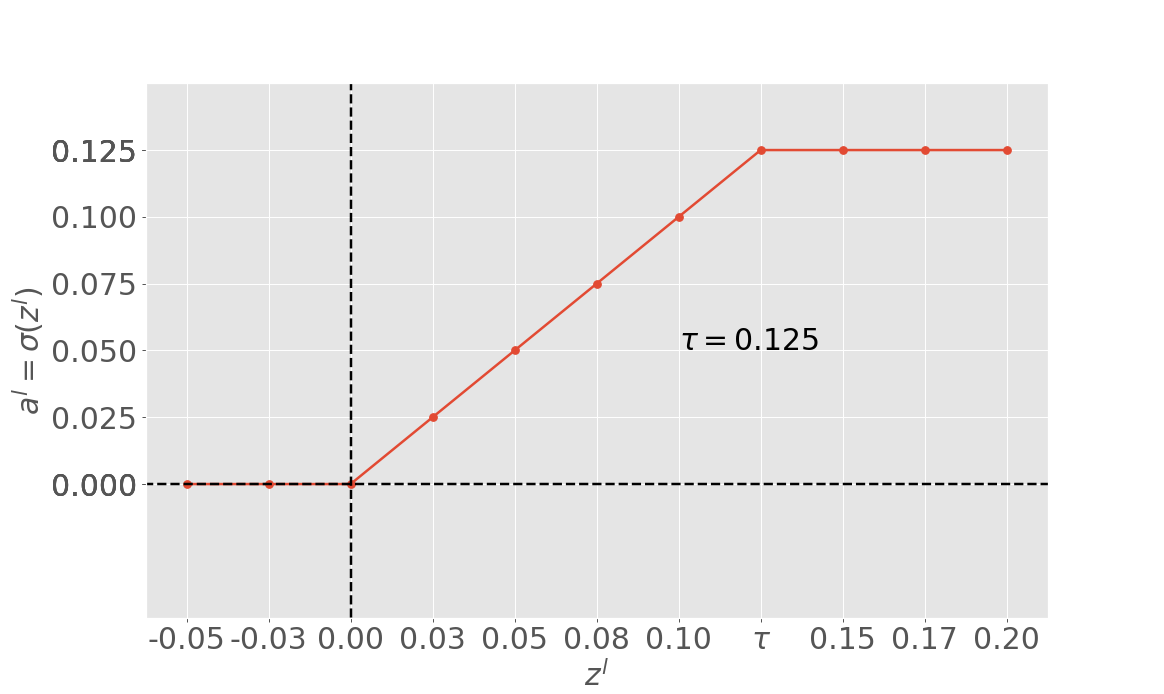

[0.    0.    0.    0.025 0.05  0.075 0.1   0.125 0.125 0.125 0.125]
['-0.05', '-0.03', '0.00', '0.03', '0.05', '0.08', '0.10', '0.12', '0.15', '0.17', '0.20']


In [32]:
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['font.size'] = 24
fig, ax = plt.subplots(figsize=(13, 7.75))
ax.plot(X,Y,'o-')
ax.set_xticks(X)
#Y = [ '%.2f' % elem for elem in Y ]
ax.set_yticks(Y)
tau_loc = np.where(X==tau)[0][0]
print(Y)
X = X.tolist()
X = [ '%.2f' % elem for elem in X ]
x_ticks_labels = [str(x) for x in X]
print(x_ticks_labels)
#x_ticks_labels[tau_loc] = '$\\tau = {}$'.format(tau)
x_ticks_labels[tau_loc] = '$\\tau$'
ax.set_ylim(-0.05,0.15)
ax.grid(b=True, which='minor', color='w', linestyle='-', alpha=1.0)
ax.set_xlabel('$z^{l}$')
ax.set_ylabel('$a^{l} = \\sigma(z^{l})$')
ax.set_xticklabels(x_ticks_labels)
ax.text(x=0.10, y=0.05, s='$\\tau = 0.125$')
ax.axvline(x=0.0, c='k', linestyle='dashed',
            ymax=5, ymin=-0.05)
ax.axhline(y=0.0, c='k', linestyle='dashed',
            xmax=5, xmin=-1.0)

plt.savefig('../../spiking_networks/mnist_results/activation_1_ieee.pdf')
plt.savefig('../../spiking_networks/mnist_results/activation_1_ieee.png')
plt.savefig('../../spiking_networks/mnist_results/activation_1_ieee.eps')
plt.show()


## Derivative of activation
* However the derivative was taken for the original activation function and not for the floored/ceiled activation function

<IPython.core.display.Javascript object>


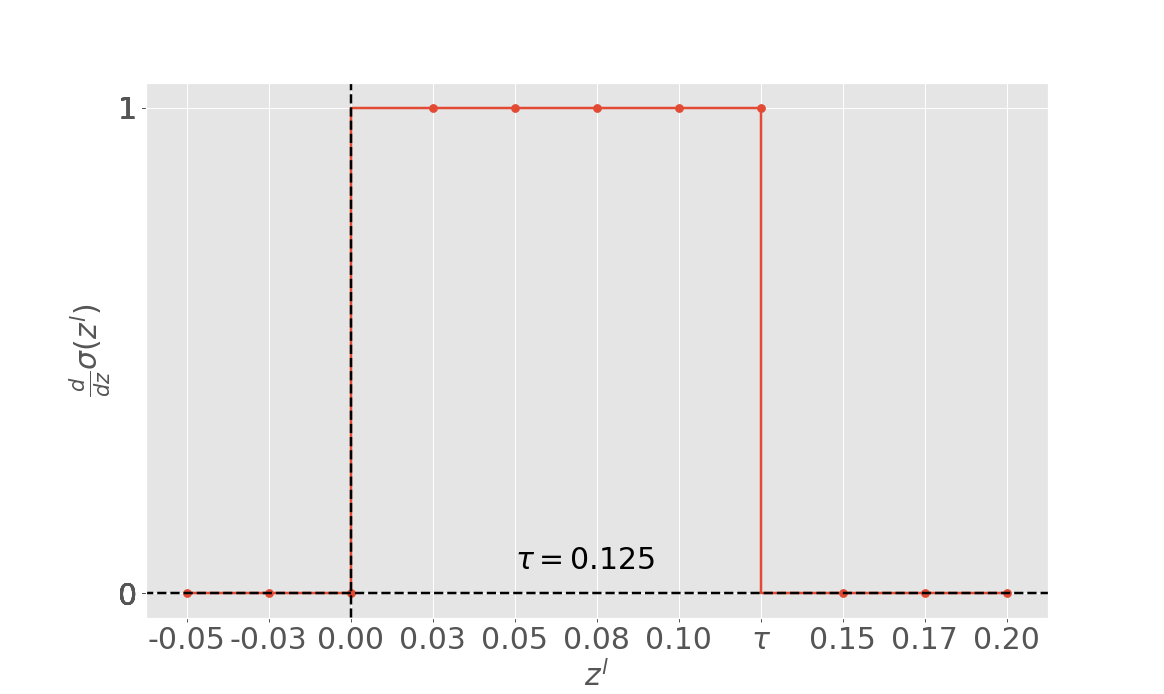

In [33]:
X = np.arange(-50,225,25).astype(np.float32)
X /= 1000
Y = f_dash(X, tau)
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['font.size'] = 24
fig, ax = plt.subplots(figsize=(13, 7.75))
ax.plot(X,Y,'o-',drawstyle='steps-pre')
ax.set_xticks(X)
ax.set_yticks(Y)
tau_loc = np.where(X==tau)[0][0]

X = X.tolist()
X = [ '%.2f' % elem for elem in X ]
x_ticks_labels = [str(x) for x in X]
x_ticks_labels[tau_loc] = '$\\tau$'
ax.grid(b=True, which='minor', color='w', linestyle='-', alpha=1.0)
ax.set_xlabel('$z^{l}$')
ax.set_ylabel('$\\frac{d}{dz}\\sigma(z^{l})$')
ax.set_xticklabels(x_ticks_labels)
ax.text(x=0.05, y=0.05, s='$\\tau = 0.125$')
ax.axvline(x=0.0, c='k', linestyle='dashed',
            ymax=5, ymin=-0.05)
ax.axhline(y=0.0, c='k', linestyle='dashed',
            xmax=5, xmin=-1.0)
plt.savefig('../../spiking_networks/mnist_results/d_activation_1_ieee.pdf')
plt.savefig('../../spiking_networks/mnist_results/d_activation_1_ieee.png')
plt.savefig('../../spiking_networks/mnist_results/d_activation_1_ieee.eps')
plt.show()
plt.show()